Text(0.5, 1.0, 'Image Label: 0')

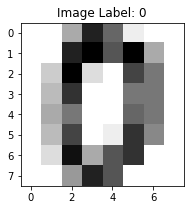

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

sample_idx = 0

plt.figure(figsize=(3,3))
plt.imshow(digits.images[sample_idx], cmap=plt.cm.gray_r,
          interpolation='nearest')

plt.title(f"Image Label: {digits.target[sample_idx]}")

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.15,
                                                   random_state=37)
# We put a random state to have reproducible results

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train) # Center and normalize
X_test = scaler.fit_transform(X_test)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1527, 64), (1527,)), ((270, 64), (270,)))

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers

In [4]:
hidden_size = 15

activations_list = [
    ['relu', 'softmax'],
    ['sigmoid', 'softmax'],
    ['tanh', 'softmax']
]

for activations in activations_list:
    model = tf.keras.Sequential()
    model.add(layers.Dense(hidden_size, input_dim=X_train.shape[1], activation=activations[0]))
    model.add(layers.Dense(10, activation=activations[1]))


    loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizers.SGD(learning_rate=0.1,
                                           momentum=0.9,
                                           nesterov=True),
                  loss=loss_function,
                 metrics=['accuracy'])
    print("Activations: ", activations)
    model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=10)
    print()
    

Activations:  ['relu', 'softmax']
Epoch 1/10
39/39 [==============================] - 0s 4ms/step - loss: 2.1781 - accuracy: 0.3096 - val_loss: 1.8635 - val_accuracy: 0.6765
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 1.7619 - accuracy: 0.7420 - val_loss: 1.6294 - val_accuracy: 0.8627
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 1.6120 - accuracy: 0.8665 - val_loss: 1.5662 - val_accuracy: 0.9052
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5791 - accuracy: 0.8935 - val_loss: 1.5603 - val_accuracy: 0.9118
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5694 - accuracy: 0.9001 - val_loss: 1.5536 - val_accuracy: 0.9118
Epoch 6/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5566 - accuracy: 0.9156 - val_loss: 1.5387 - val_accuracy: 0.9412
Epoch 7/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5311 - accuracy: 0.9402 - val_loss: 1.5247 - val_acc